In [2]:
from google.colab import files

uploaded = files.upload()


Saving Crop_recommendation.csv to Crop_recommendation.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Crop_recommendation.csv")


In [9]:
df.head()
df.info()
df.shape




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


(2200, 8)

In [10]:
df.isnull().sum()
#pas de null values


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [11]:
df.drop_duplicates(inplace=True)
df.shape


(2200, 8)

In [12]:
df.describe()
#verifier ranges of variables wsh logic


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


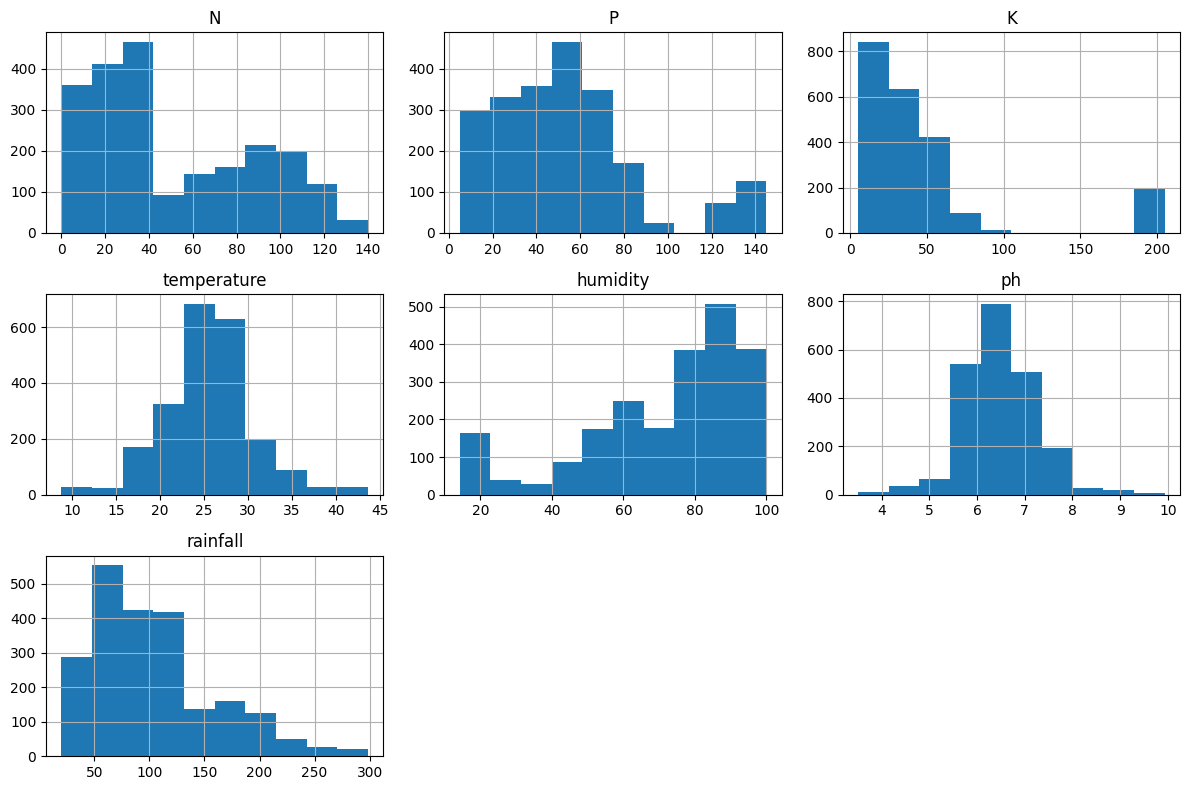

In [13]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


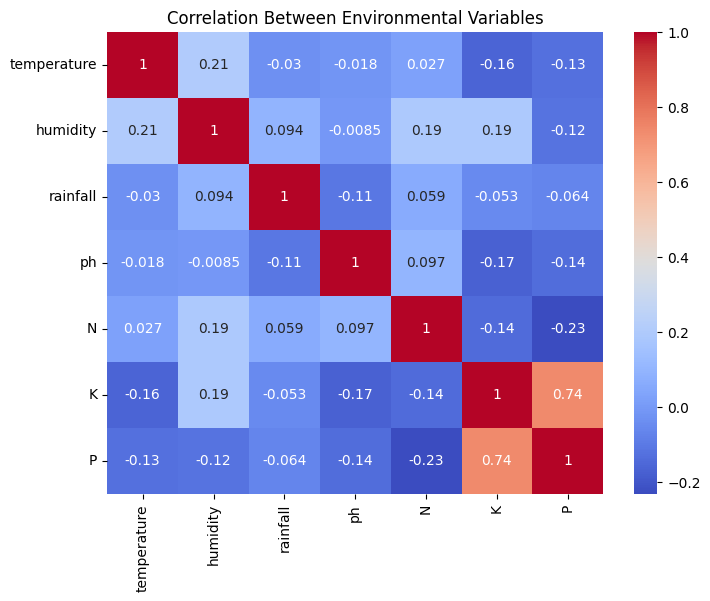

In [15]:
#correlation entre les vars num

corr = df[['temperature', 'humidity', 'rainfall', 'ph' ,'N' , 'K' , 'P']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Environmental Variables")
plt.show()

#pas de relation lineaire claire entre les vars.
#for  understanding the data NO need to normalize or standardize.



Les variables environnementales étudiée sont faiblement corrélées entre elles, ce qui indique qu’elles apportent des informations complémentaires et indépendantes.

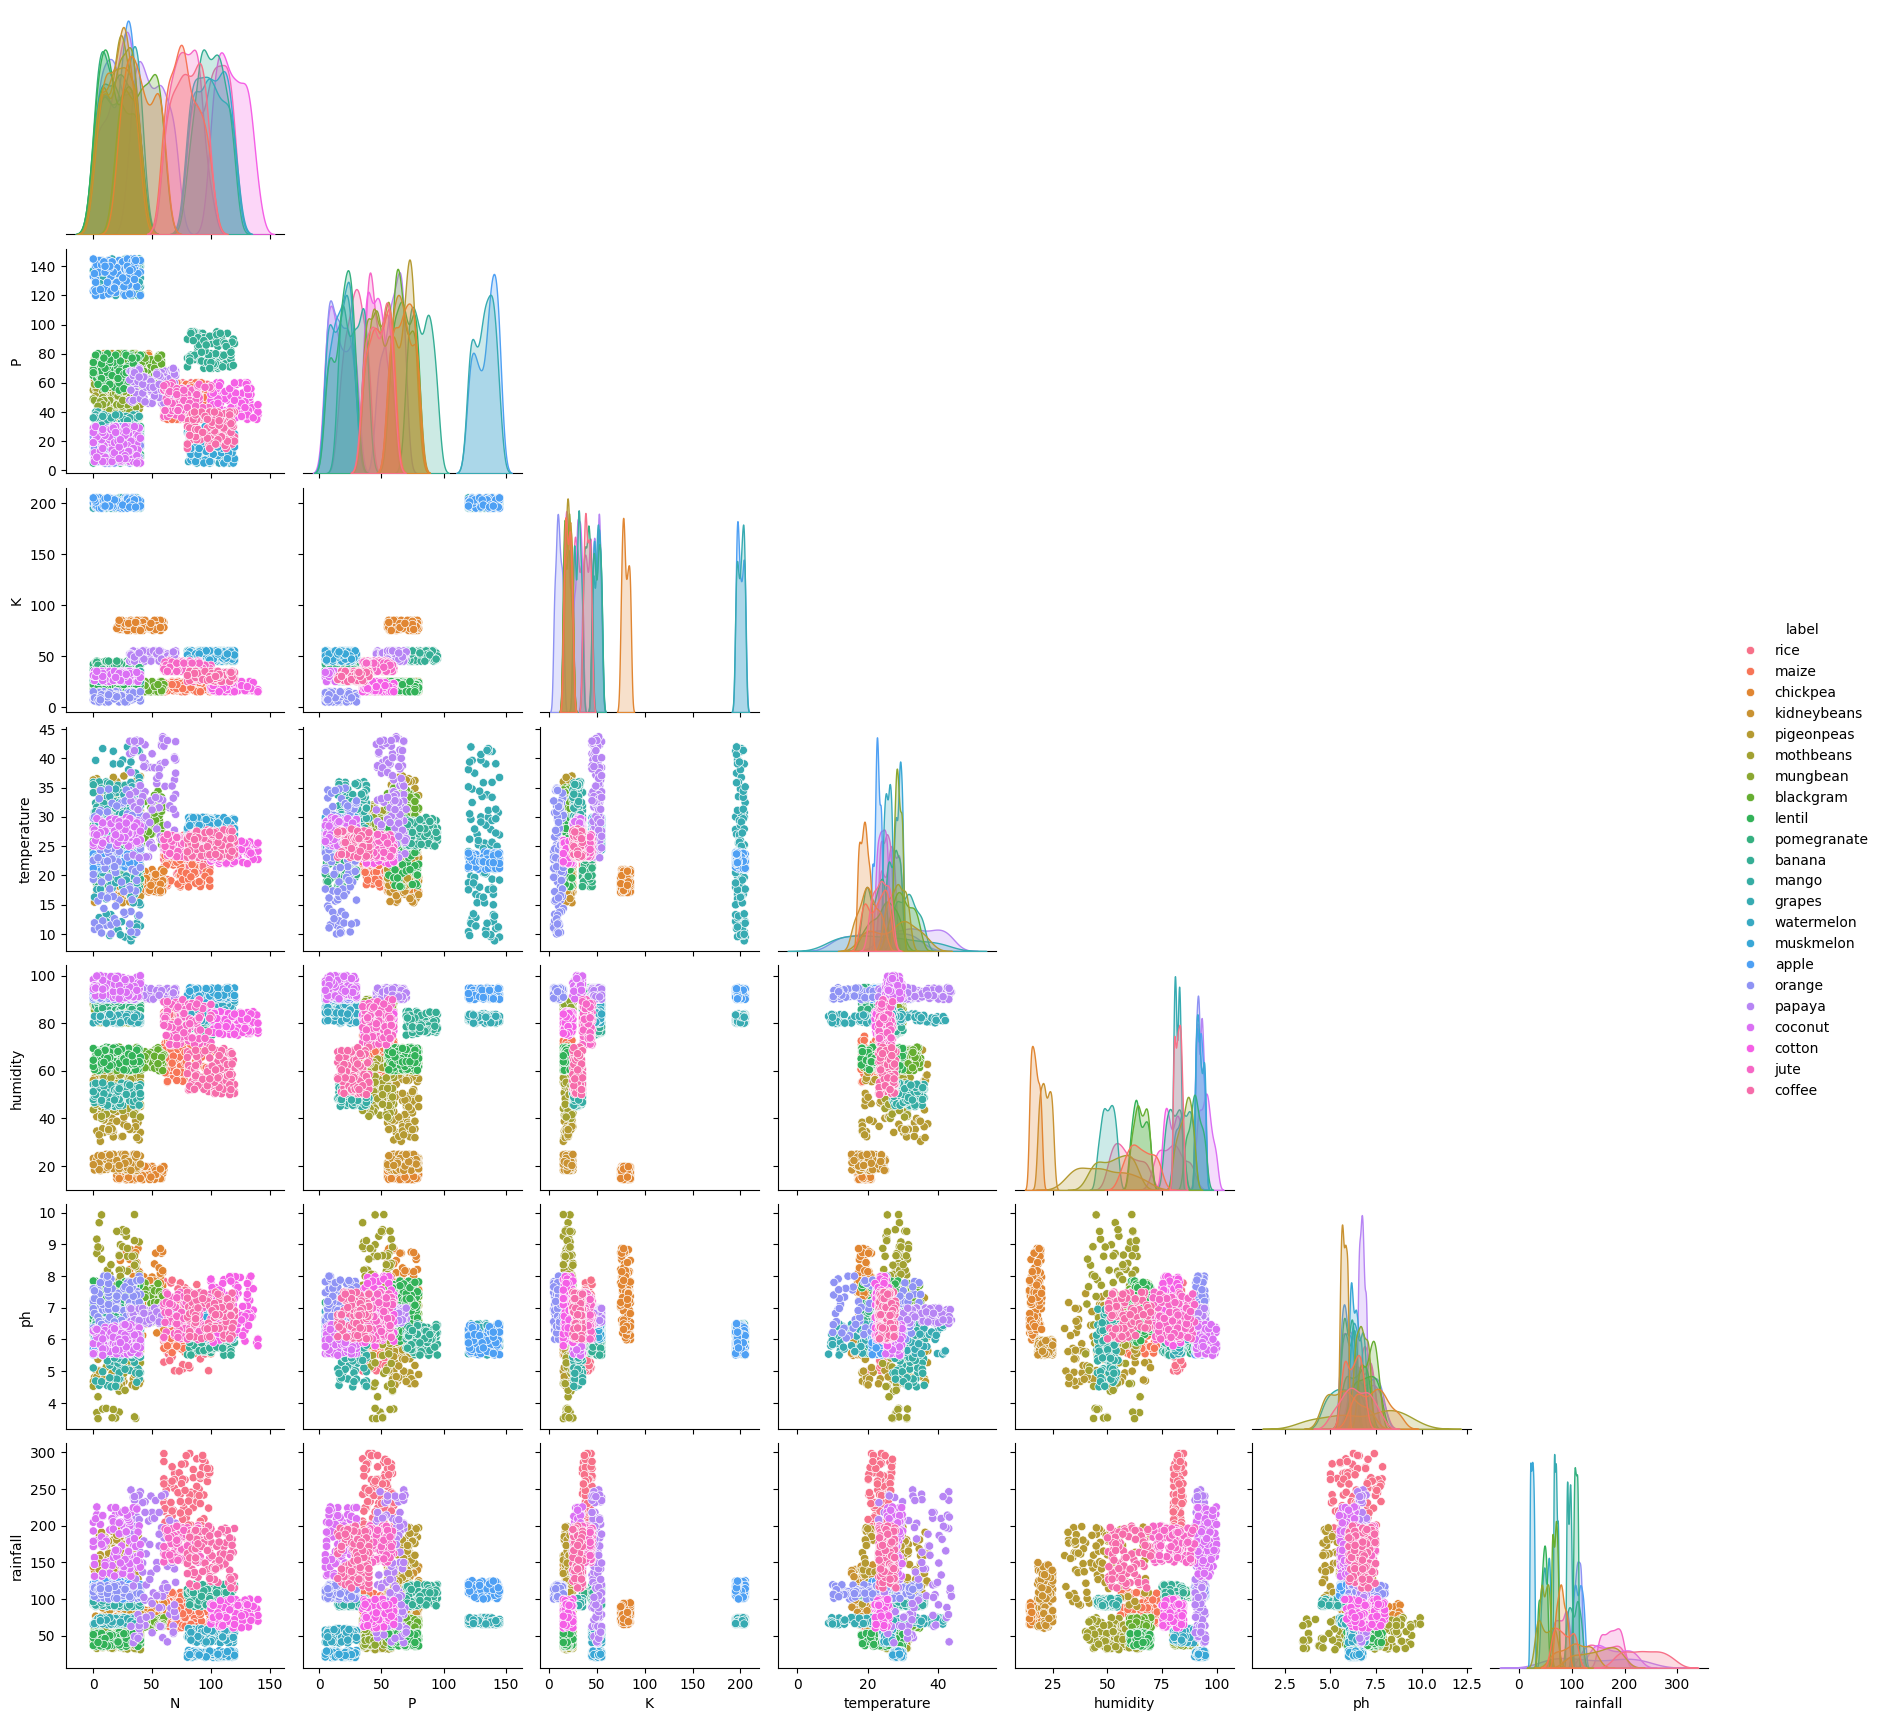

In [16]:
sns.pairplot(df, hue='label', corner=True)
plt.show()


In [17]:
grouped = df.groupby('label').mean()
grouped

#en moyenne , chaque label correspond à des valeurs typiques de température, d’humidité, de pluie et de pH.


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


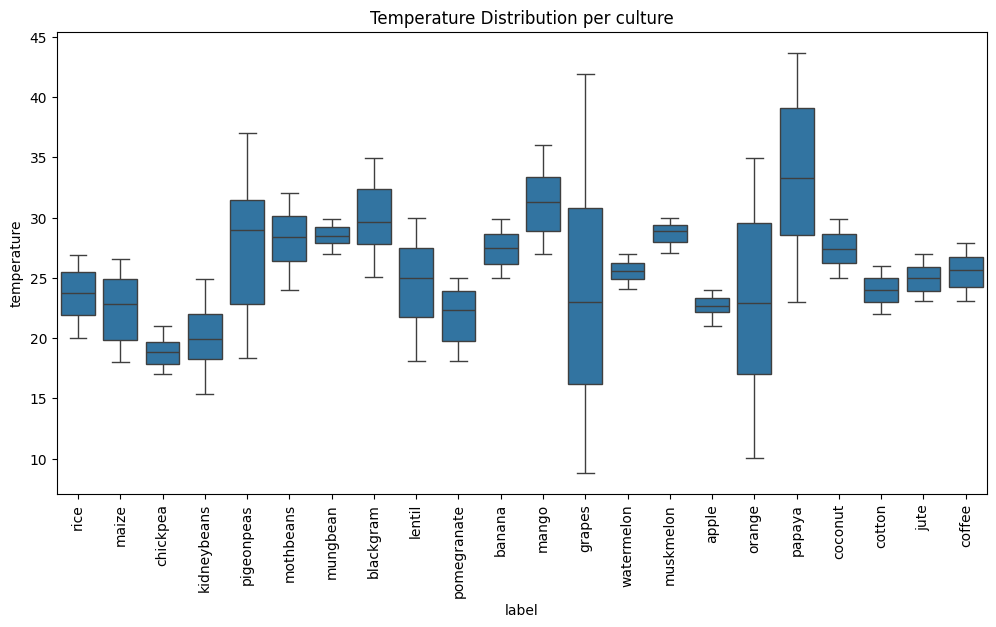

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(x='label', y='temperature', data=df)
plt.xticks(rotation=90)
plt.title("Temperature Distribution per culture")
plt.show()


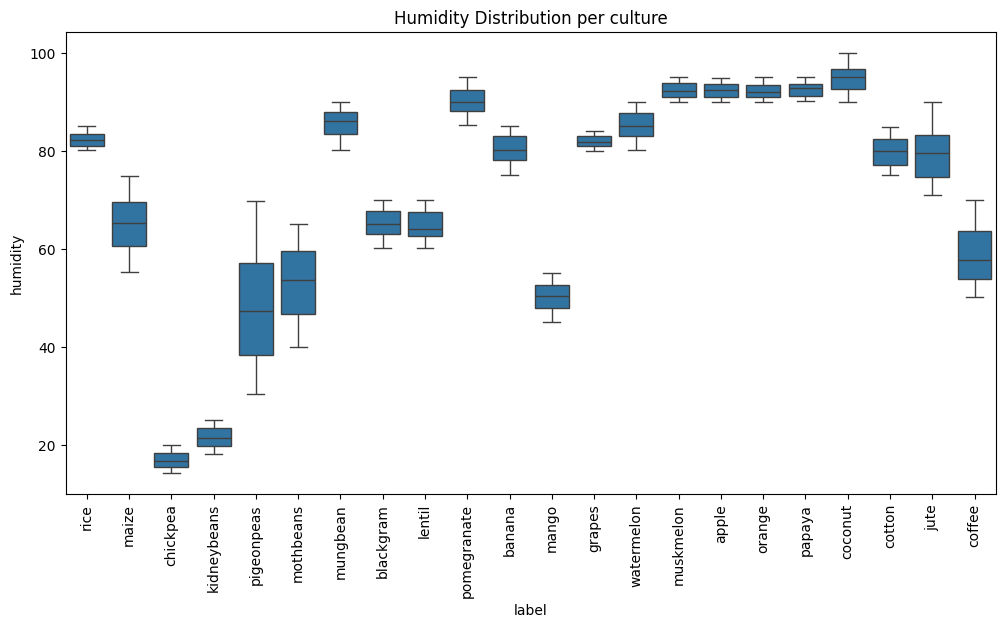

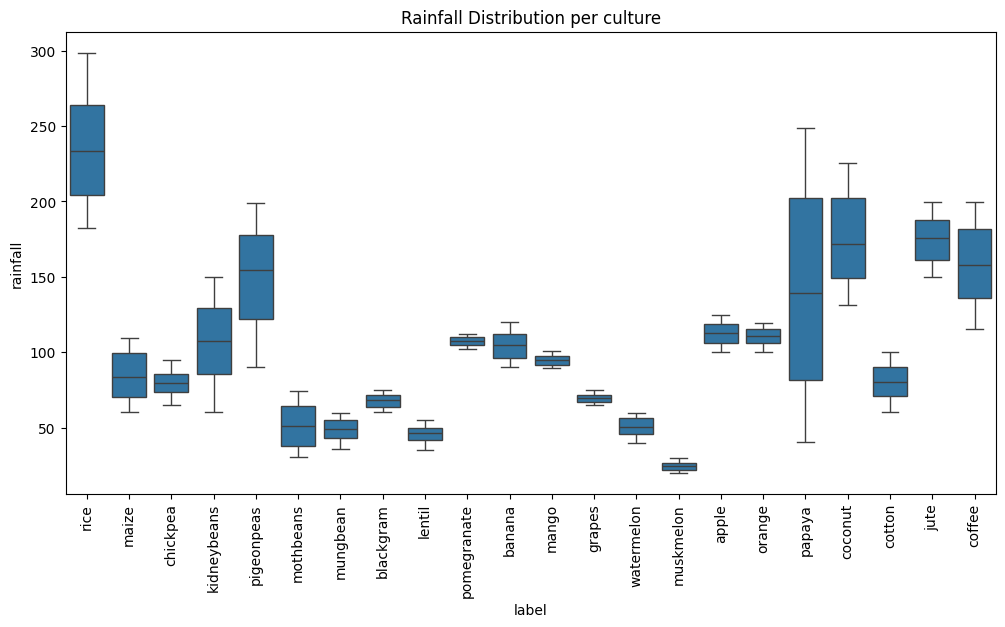

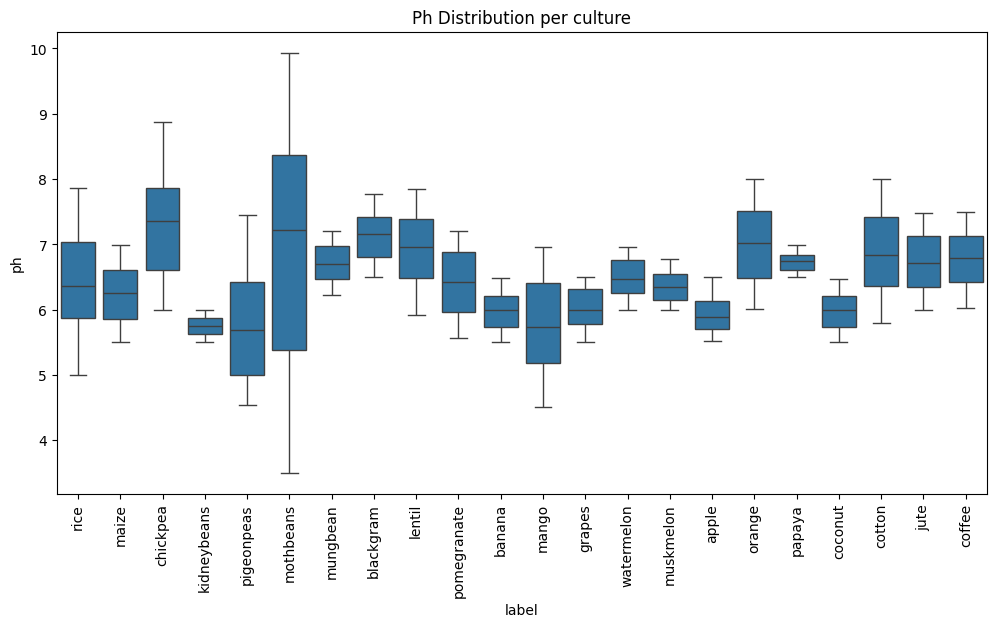

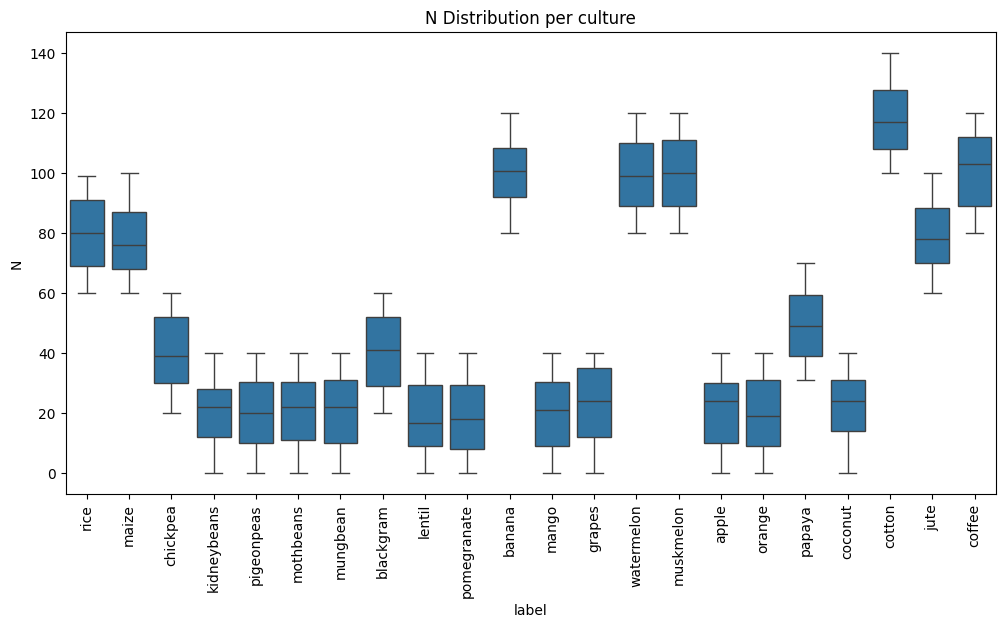

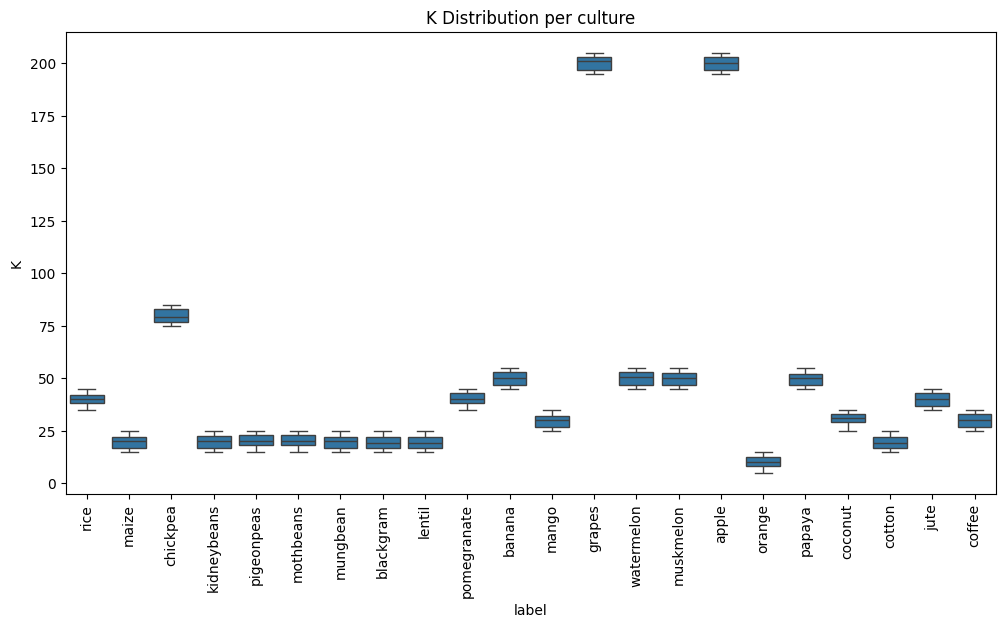

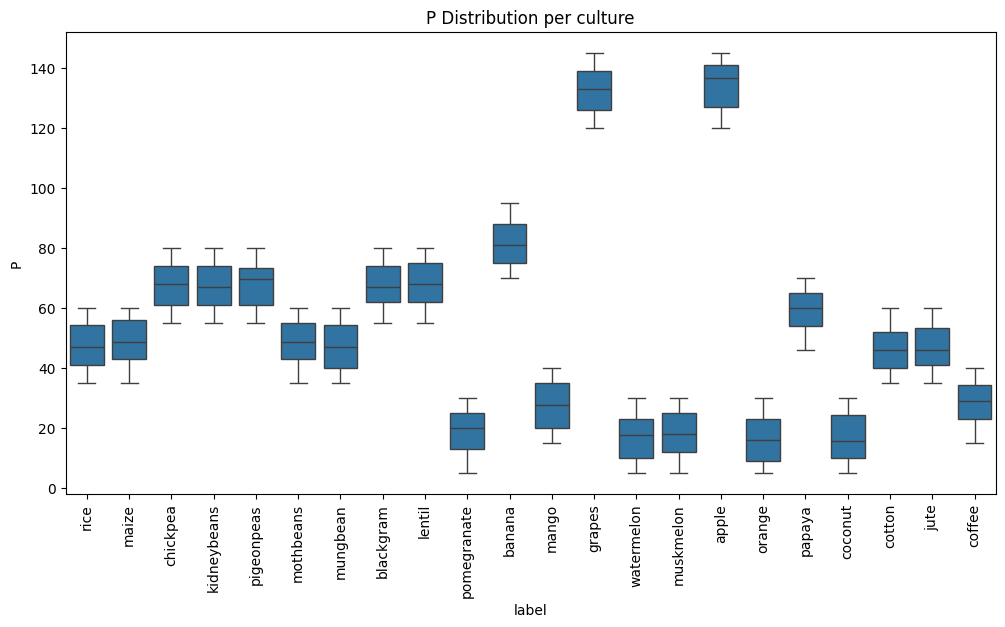

In [19]:
for col in ['humidity', 'rainfall', 'ph','N' , 'K' , 'P']:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='label', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f"{col.capitalize()} Distribution per culture")
    plt.show()


Pour ce type de données agricoles :

🌳 Random Forest (excellent choix)

🌲 Decision Tree

🚀 XGBoost / Gradient Boosting

📐 KNN (après normalisation)


In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encodage du label
le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])

# Variables explicatives et cible
X = df[['temperature', 'humidity', 'rainfall', 'ph','N' , 'K' , 'P']]
y = df['label_enc']

# ⚠️ IMPORTANT : le scaling n’est PAS nécessaire pour Random Forest
# mais on peut le garder pour cohérence si tu compares avec d’autres modèles
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # 🔥 correction importante
)

# Modèle Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Importance des variables
importances = rf.feature_importances_

imp_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance_RF': importances
}).sort_values(by='Importance_RF', ascending=False)

imp_df


,Variable,Importance_RF
1,humidity,0.221770
2,rainfall,0.213600
5,K,0.177709
6,P,0.150091
4,N,0.107302
0,temperature,0.072960
3,ph,0.056570


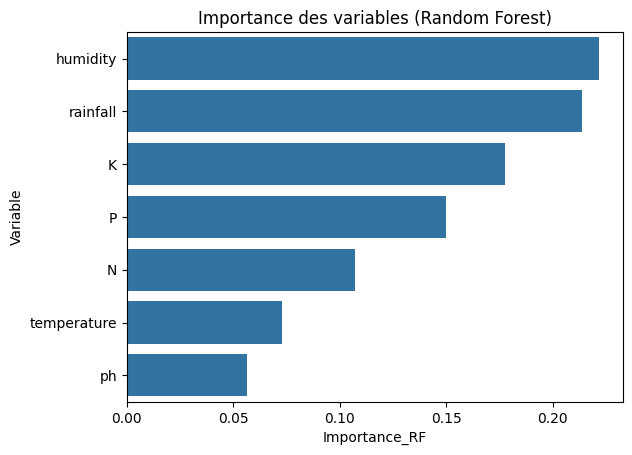

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x='Importance_RF',
    y='Variable',
    data=imp_df
)

plt.title('Importance des variables (Random Forest)')
plt.show()

